In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv("../Cosmics_Rays_Data/datas/datas_released/AllStations_Counts.out")

In [3]:
cols_id=~data.columns.str.contains("Norm")
data_in=data.drop(columns=data.columns[cols_id==False])
data_in=data_in[(data_in.index>="2008-12-01")&(data_in.index<="2019-12-01")]

In [4]:
data_in.head()

,Apatity_Count,Athens_Count,Baksan_Count,Barentsburg_Count,Beijing_Count,Calgary_Count,CapeShmidt_Count,Climax_Count,Esoi_Count,FortSmith_Count,...,Moscow_Count,Newark_Count,Novosibirsk_Count,Oulu_Count,Rome_Count,Tbilisi_Count,Thule_Count,Tixie_Count,Tsumeb_Count,Yakutsk_Count
2008-12-01 00:00:00,8000.0,3371.0,7601.0,10330.0,2108.0,NaN,5590.0,NaN,10902.0,13520.0,...,9514.0,3675.0,11865.0,6698.0,4854.0,9063.0,4661.0,6248.0,12137.0,NaN
2008-12-01 01:00:00,8008.0,3400.0,7555.0,10336.0,2108.0,NaN,5597.0,NaN,10953.0,13498.0,...,9469.0,3667.0,11801.0,6670.0,4856.0,9116.0,4651.0,6242.0,12156.0,NaN
2008-12-01 02:00:00,7993.0,3408.0,7657.0,10345.0,2117.0,NaN,5613.0,NaN,10935.0,13518.0,...,9454.0,3659.0,11792.0,6726.0,4834.0,9101.0,4649.0,6233.0,12169.0,6354.0
2008-12-01 03:00:00,7993.0,3416.0,7581.0,10360.0,2100.0,NaN,5604.0,NaN,10952.0,13525.0,...,9478.0,3664.0,11855.0,6678.0,4854.0,9093.0,4665.0,6264.0,12145.0,6342.0
2008-12-01 04:00:00,7996.0,3382.0,7617.0,10342.0,2088.0,NaN,5606.0,NaN,10943.0,13562.0,...,9448.0,3662.0,11847.0,6737.0,4837.0,9103.0,4653.0,6233.0,12147.0,NaN


In [5]:
miss=pd.DataFrame(data_in.isna().sum()/len(data_in))
data_in0=data_in[miss[miss[0]<0.30].index]

In [6]:
data_in0.head()

,Apatity_Count,Athens_Count,Baksan_Count,Barentsburg_Count,Esoi_Count,FortSmith_Count,Hermanus_Count,Inuvik_Count,Irkutsk2000_Count,Irkutsk435_Count,...,McMurdo_Count,Moscow_Count,Newark_Count,Novosibirsk_Count,Oulu_Count,Rome_Count,Thule_Count,Tixie_Count,Tsumeb_Count,Yakutsk_Count
2008-12-01 00:00:00,8000.0,3371.0,7601.0,10330.0,10902.0,13520.0,4519.0,7212.0,6135.0,6751.0,...,10385.0,9514.0,3675.0,11865.0,6698.0,4854.0,4661.0,6248.0,12137.0,NaN
2008-12-01 01:00:00,8008.0,3400.0,7555.0,10336.0,10953.0,13498.0,4500.0,7224.0,6141.0,6727.0,...,10386.0,9469.0,3667.0,11801.0,6670.0,4856.0,4651.0,6242.0,12156.0,NaN
2008-12-01 02:00:00,7993.0,3408.0,7657.0,10345.0,10935.0,13518.0,4487.0,7221.0,6147.0,6729.0,...,10401.0,9454.0,3659.0,11792.0,6726.0,4834.0,4649.0,6233.0,12169.0,6354.0
2008-12-01 03:00:00,7993.0,3416.0,7581.0,10360.0,10952.0,13525.0,4492.0,7204.0,6137.0,6777.0,...,10392.0,9478.0,3664.0,11855.0,6678.0,4854.0,4665.0,6264.0,12145.0,6342.0
2008-12-01 04:00:00,7996.0,3382.0,7617.0,10342.0,10943.0,13562.0,4490.0,7220.0,6158.0,6761.0,...,10410.0,9448.0,3662.0,11847.0,6737.0,4837.0,4653.0,6233.0,12147.0,NaN


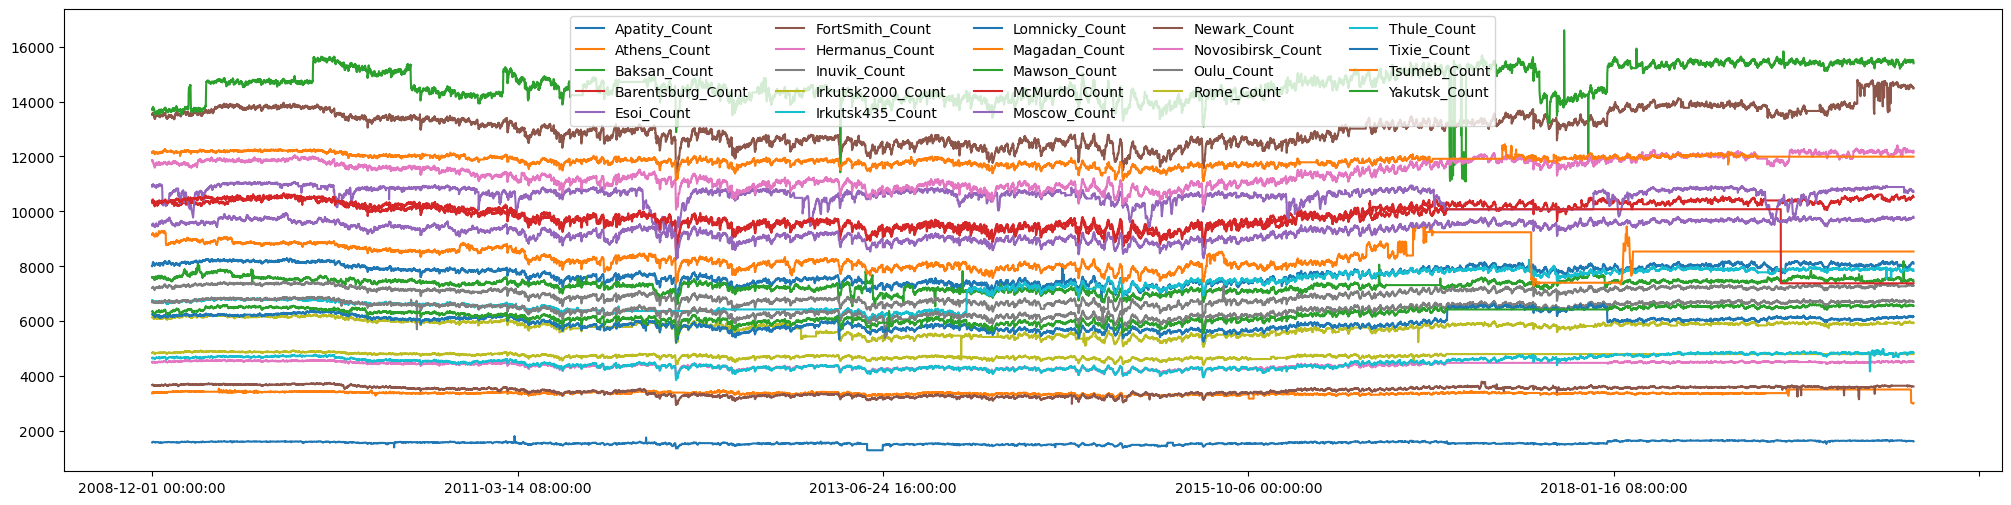

In [7]:
data_in0.ewm(span=20).mean().plot(figsize=(25,6))
plt.legend(ncol=5)
plt.show()

In [8]:
data_in0=data_in0.drop(columns=["Baksan_Count","Irkutsk435_Count","Magadan_Count","McMurdo_Count","Mawson_Count","Tixie_Count","Tsumeb_Count"])

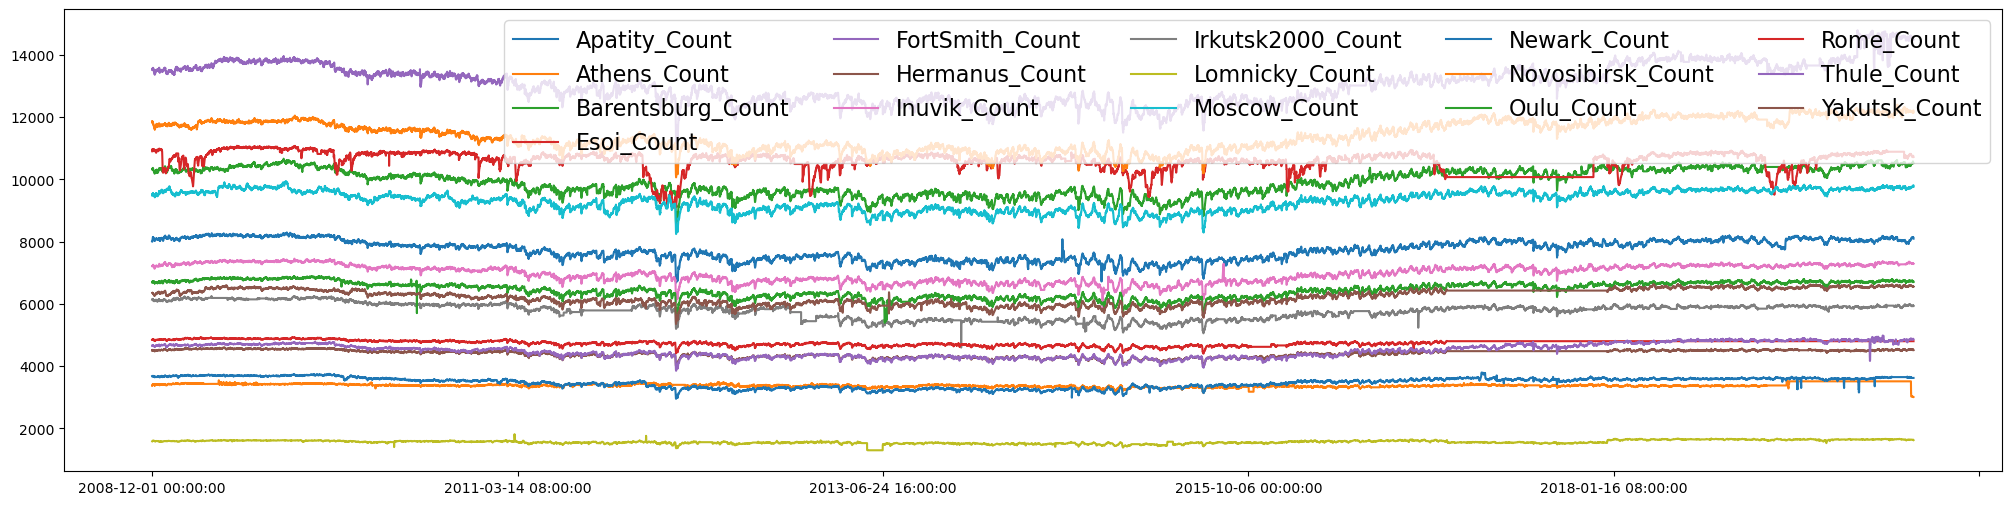

In [9]:
data_in0.ewm(span=20).mean().plot(figsize=(25,6))
plt.legend(ncol=5,fontsize=16)
plt.show()

In [10]:
data_in0.columns

Index(['Apatity_Count', 'Athens_Count', 'Barentsburg_Count', 'Esoi_Count',
       'FortSmith_Count', 'Hermanus_Count', 'Inuvik_Count',
       'Irkutsk2000_Count', 'Lomnicky_Count', 'Moscow_Count', 'Newark_Count',
       'Novosibirsk_Count', 'Oulu_Count', 'Rome_Count', 'Thule_Count',
       'Yakutsk_Count'],
      dtype='object')

In [11]:
data_in0.index=pd.to_datetime(data_in0.index)

In [12]:
for i in data_in0.columns:
    data_in0[i].ewm(span=20).mean().dropna().to_csv(i,index=False, header=False)

In [13]:
data_in0_day=data_in0.resample("D").mean()

In [14]:
data_in0_month=data_in0.resample("M").mean()

In [15]:
#data_in0_month

In [16]:
len(data_in0), len(data_in0_day), len(data_in0_month)

(96408, 4017, 132)

In [17]:
for i in data_in0.columns:
    data_in0_day[i].dropna().to_csv(i+"_day",index=False, header=False)

In [18]:
for i in data_in0.columns:
    data_in0_month[i].dropna().to_csv(i+"_month",index=False, header=False)

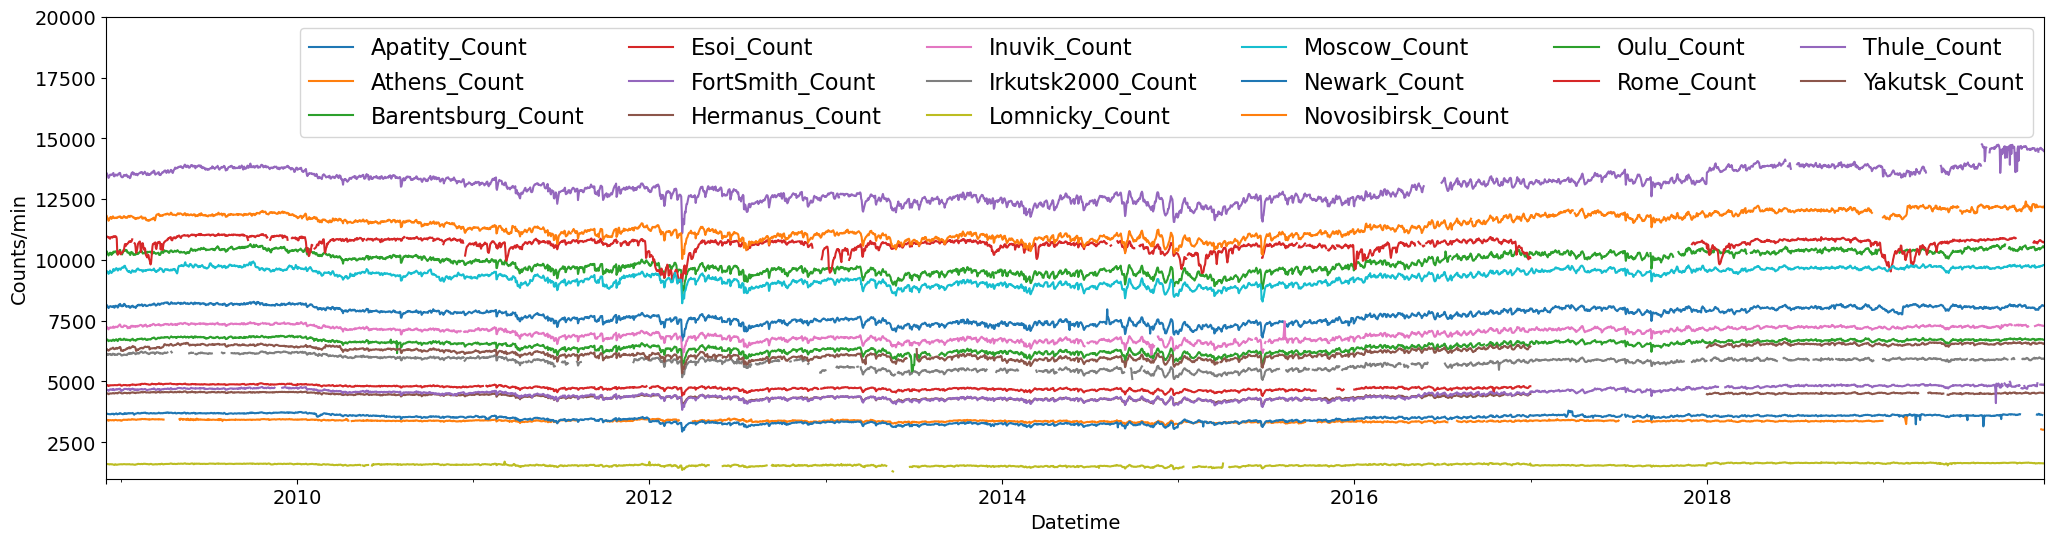

In [22]:
data_in0_day.plot(figsize=(25,6))
plt.legend(ncol=6,fontsize=16)
plt.ylim(1000,20000); plt.xticks(fontsize=14); plt.yticks(fontsize=14); plt.ylabel("Counts/min",fontsize=14); plt.xlabel("Datetime",fontsize=14)
plt.savefig("neutroMonitors.pdf",dpi=400,bbox_inches="tight")
plt.show()

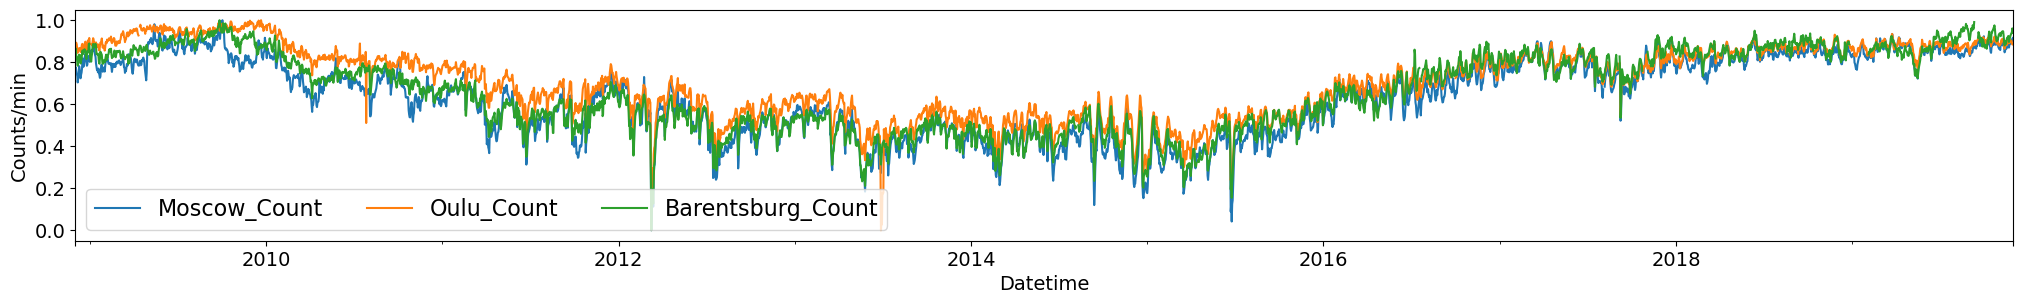

In [37]:
((data_in0_day["Moscow_Count"]-data_in0_day["Moscow_Count"].min())/(data_in0_day["Moscow_Count"].max()-data_in0_day["Moscow_Count"].min())).plot(figsize=(25,3))
((data_in0_day["Oulu_Count"]-data_in0_day["Oulu_Count"].min())/(data_in0_day["Oulu_Count"].max()-data_in0_day["Oulu_Count"].min())).plot(figsize=(25,3))
((data_in0_day["Barentsburg_Count"]-data_in0_day["Barentsburg_Count"].min())/(data_in0_day["Barentsburg_Count"].max()-data_in0_day["Barentsburg_Count"].min())).plot(figsize=(25,3))
plt.legend(ncol=6,fontsize=16,loc=3)
plt.xticks(fontsize=14); plt.yticks(fontsize=14); plt.ylabel("Counts/min",fontsize=14); plt.xlabel("Datetime",fontsize=14)
plt.savefig("neutroMonitors2.pdf",dpi=400,bbox_inches="tight")
plt.show()

Finished....

In [186]:
from visibility_graph import visibility_graph
import networkx as nx

In [187]:
#nx.write_edgelist(g_Apatity_Count, "test.edgelist")

In [188]:
G = nx.read_edgelist("Apatity_Count_day_vis_results", nodetype=int)

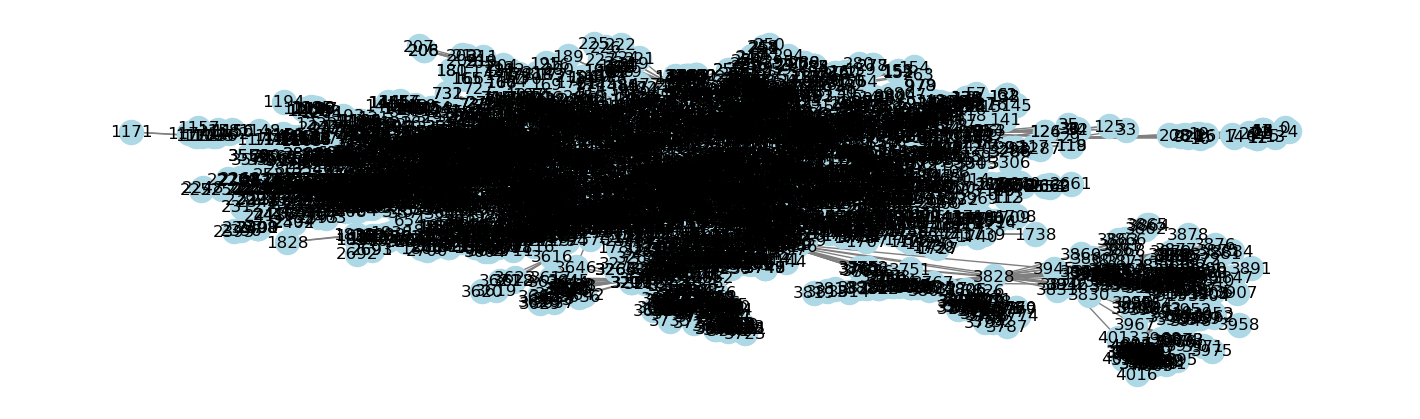

In [189]:
plt.figure(figsize=(14,4))
G = nx.Graph()
G.add_nodes_from(g.nodes)
G.add_edges_from(g.edges)
nx.draw(G, with_labels=True, node_color='lightblue', edge_color='gray')

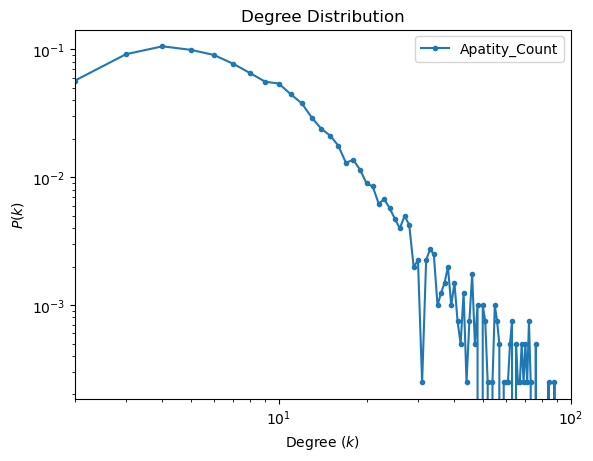

In [166]:
# Calculate degree distribution
degree_sequence = G.degree()#[G.degree(node) for node in G.nodes()]
degree_count = nx.degree_histogram(G)
degrees = range(len(degree_count))

# Normalize the degree distribution
degree_distribution = [count / float(sum(degree_count)) for count in degree_count]

# Plot degree distribution
plt.plot(degrees, degree_distribution, label="Apatity_Count", marker="o", markersize=3)
plt.xlabel(r'Degree ($k$)'); plt.ylabel(r'$P(k)$'); plt.title('Degree Distribution'); plt.xscale("log"); plt.yscale("log"); plt.legend();plt.xlim(2,100)
plt.show()

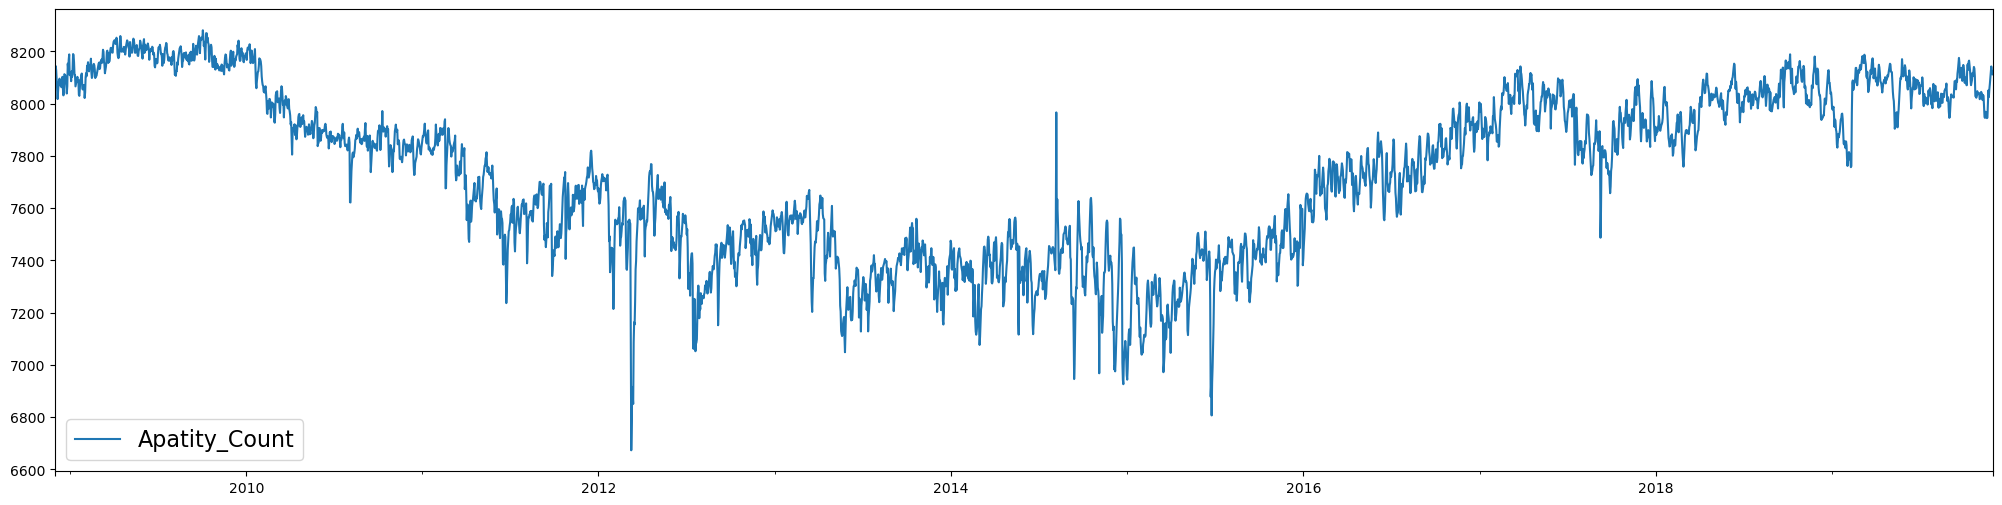

In [85]:
data_in0_day["Apatity_Count"].plot(figsize=(25,6))
plt.legend(ncol=6,fontsize=16)
plt.show()

In [152]:
import statsmodels.api as sm
x0=np.array(np.log10(degrees))
y0=np.array(np.log10(degree_distribution))

x = x0[(x0>=1.1)&(x0<=1.6)]
y = y0[(x0>=1.1)&(x0<=1.6)]



/tmp/ipykernel_43837/2921749733.py:2: RuntimeWarning: divide by zero encountered in log10
  x0=np.array(np.log10(degrees))
/tmp/ipykernel_43837/2921749733.py:3: RuntimeWarning: divide by zero encountered in log10
  y0=np.array(np.log10(degree_distribution))


(0.5, 2.0)

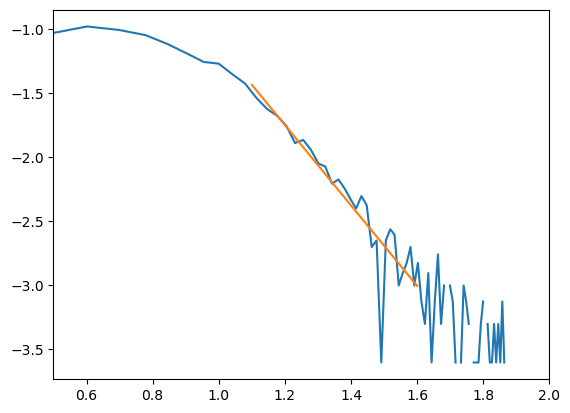

In [154]:
plt.plot(x0,y0)
plt.plot(np.linspace(1.1,1.6,10),(np.linspace(1.1,1.6,10))*(-3.1453)+2.0270)
plt.xlim(0.5,2)

In [153]:
x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
predictions = model.predict(x) 

print_model = model.summary()
print(print_model)

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.818
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     112.5
Date:                Mon, 26 Jun 2023   Prob (F-statistic):           9.63e-11
Time:                        05:16:37   Log-Likelihood:                 4.2373
No. Observations:                  27   AIC:                            -4.475
Df Residuals:                      25   BIC:                            -1.883
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.0270      0.415      4.881      0.0

In [156]:
10**(-3.1453)

0.0007156488866926983

/tmp/ipykernel_43837/1368978538.py:4: RuntimeWarning: divide by zero encountered in power
  return a * np.power(x, b)


Exponential Fit: y = (a*(x**b))
	a = popt[0] = 0.004048477498224378
	b = popt[1] = 9.000036781950492e-09


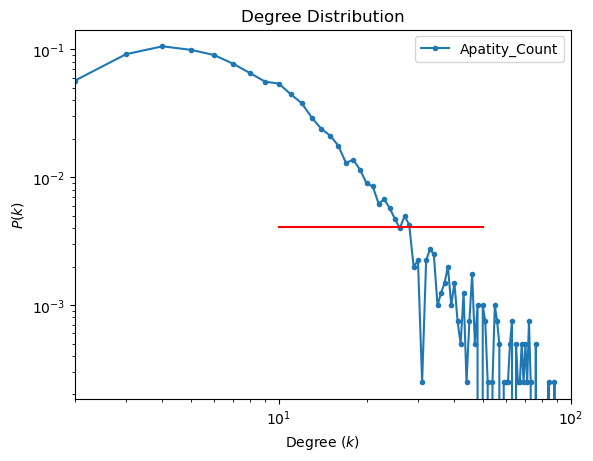

In [180]:
from scipy.optimize import curve_fit
newX = np.linspace(10, 50, 10)
def myExpFunc(x, a, b):
    return a * np.power(x, b)
popt, pcov = curve_fit(myExpFunc, degrees, degree_distribution)

plt.plot(degrees, degree_distribution, label="Apatity_Count", marker="o", markersize=3)
plt.xlabel(r'Degree ($k$)'); plt.ylabel(r'$P(k)$'); plt.title('Degree Distribution'); plt.legend();plt.xlim(2,100)
plt.plot(newX, myExpFunc(newX, *popt), 'r-', 
         label="({0:.3f}*x**{1:.3f})".format(*popt))
plt.xscale("log"), plt.yscale("log")
print("Exponential Fit: y = (a*(x**b))")
print("\ta = popt[0] = {0}\n\tb = popt[1] = {1}".format(*popt))

In [183]:
fit = np.polyfit(degrees, degree_distribution, 1)

In [184]:
fit

array([-8.9385109e-05,  1.5071319e-02])